**CONTENTS**

1.   Preparation for Analysis


*   Download of the libraries


2.   Data Manupulation

*  Investigate some data meanings
*  Loading and Checking of data
*  İnvestigate null values
*  İnvestigate Unique Value
*  İnvestigate Null Values

3.   Data Cleaning
*  İnvestigate null values and Clean
*  İnvestigate Unique Value and Clean
*  İnvestigate Null Values and Clean

4.  Data Visualisation
*   Make new Features
*   Visualisation
*   Geospatial Analysis and Visualisation

5.  Correlation
*   Dealing with categorical and numerical column
*   Preprocessing the data
*   Statistical Analysis




# 1) Preparation for Analysis

In [ ]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from datetime import datetime
from dateutil import parser
import plotly.express as px
from pandas.core.groupby.groupby import nullcontext
import statsmodels.api as sm


 #Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE


# 2.DATA MANUPULATION

In [ ]:
# First, let's get to know the variables in the dataset.

#Country of Origin: Kahvenin hangi ülkede üretildiğini söyler.
#Farm Name : Üretildiği çiftliğin adlarını bize verir.
#Lot Number : Parti numarası.
#Mill : Kahve çekirdeklerinin işlendiği değirmenin adı.
#Company : Kahve üreten veya satan şirketin adı.
#Altitude : Kahve çekirdeklerinin yetiştiği rakım seviyesi.
#Region : Kahve çekirdeklerinin yetiştiği bölge.
#Producer : Kahve üreticisi veya üretici şirketin adı.
#Number of Bags : Kahve çekirdeklerinin kaç çuvalda olduğu.
#Bag Weight : Bir çuvallık kahve çekirdeği ağırlığı.
#In-Country Partner : Üretici veya tedarikçi şirketin yerel ortağı veya iş birliği yaptığı kişi/şirket.
#Harvest Year : Kahve çekirdeklerinin hasat yılı.
#Grading Date : Kahve çekirdeklerinin sınıflandırma tarihi.
#Owner : Kahve çekirdeklerinin sahibi.
#Variety : Kahve bitkisinin çeşidi.
#Status : Kahve çekirdeklerinin durumu veya statüsü.
#Processing Method : Kahve çekirdeklerinin işlenme yöntemi.
#Aroma : Kahvenin kokusu veya aroması.
#Flavor : Kahvenin aroması, herhangi bir tatlılık, acılık, asitlik ve diğer lezzet notları dahil olmak üzere tada göre değerlendirilir.
#Aftertaste : Kahveyi yuttuktan sonra ağızda kalan tadı ifade eder.
#Acidity : Kahvedeki asitlik, tadın parlaklığını veya canlılığını ifade eder.
#Body : Kahvenin gövdesi, kahvenin ağızdaki kalınlığını veya viskozitesini ifade eder.
#Balance : Denge, kahvenin farklı lezzet bileşenlerinin birlikte ne kadar iyi çalıştığını ifade eder.
#Uniformity : Kahvenin homojenliği veya benzerlik derecesi. Tekdüzelik, kahvenin fincandan bardağa tutarlılığını ifade eder.
#Clean Cup : Kahvenin temiz ve arıntısız olma derecesi. Temiz bir fincan, ekşilik, küf veya bayatlık gibi herhangi bir kötü tat veya kusur içermeyen bir kahveyi ifade eder.
#Sweetness : Kahvenin tatlılık özelliği. Karamel benzeri, meyvemsi veya çiçeksi olarak tanımlanabilir ve kahvede aranan bir kalitedir.
#Overall : Kahvenin genel olarak değerlendirildiği özellik
#Defects : Kahve çekirdeklerinde bulunan kusur sayısı veya türleri.
#Total Cup Points : Kahvenin toplam puanı. (HEDEF DEĞİŞKEN) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#Moisture Percentage : Kahve çekirdeklerinin nem oranı.
#Category One Defects : Birinci kategori kusurların sayısı veya türleri.
#Quakers : Kahve çekirdeklerindeki eksik veya kötü kalitede çekirdeklerin sayısı.
#Color : Kahve çekirdeklerinin rengi.
#Category Two Defects : İkinci kategori kusurların sayısı veya türleri.
#Expiration : Kahve çekirdeklerinin son kullanma tarihi.
#Certification Body : Sertifikasyon kuruluşunun adı.
#Certification Address : Sertifikasyon kuruluşunun adresi.
#Certification Contact : Sertifikasyon kuruluşunun iletişim bilgileri.

In [ ]:
# Read coffee table
df=pd.read_csv("/content/drive/MyDrive/Up School/Up-school Projects/FATMA NUR/coffee_data_set.zip")


In [ ]:
df.shape

(207, 41)

In [ ]:
df.head(1)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [ ]:
# I want to see all column name by variables. So ı take Transpose of dataframe.
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,0,1,2,3,4
Country of Origin,Colombia,Taiwan,Laos,Costa Rica,Colombia
Farm Name,Finca El Paraiso,Royal Bean Geisha Estate,OKLAO coffee farms,La Cumbre,Finca Santuario
Lot Number,CQU2022015,"The 2022 Pacific Rim Coffee Summit,T037","The 2022 Pacific Rim Coffee Summit,LA01",CQU2022017,CQU2023002
Mill,Finca El Paraiso,Royal Bean Geisha Estate,oklao coffee processing plant,La Montana Tarrazu MIll,Finca Santuario
ICO Number,NaN,NaN,NaN,NaN,NaN
Company,Coffee Quality Union,Taiwan Coffee Laboratory,Taiwan Coffee Laboratory,Coffee Quality Union,Coffee Quality Union
Altitude,1700-1930,1200,1300,1900,1850-2100
Region,"Piendamo,Cauca",Chiayi,Laos Borofen Plateau,"Los Santos,Tarrazu","Popayan,Cauca"


In [ ]:
#information about columns name
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [ ]:
#information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [ ]:
#null control
print(df.isnull().sum())

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

***Investigate some data meanings***


In [ ]:
#Category 1 defect: Full black or sour bean, pod/cherry, and large or medium sticks or stones.
#Category 2 defect: Parchment, hull/husk, broken/chipped, insect damage, partial black or sour, shell, small sticks or stones, water damage.
print(df['Category One Defects'].unique())
print(df['Category Two Defects'].unique())

[0 2 1 3 4 5]
[ 3  0  2  1  5  4  9  7 12 11 16  8 10 13]


In [ ]:
print(df['Processing Method'].unique())

['Double Anaerobic Washed' 'Washed / Wet' 'Semi Washed' 'Honey,Mossto'
 'Natural / Dry' 'Pulped natural / honey' nan
 'Double Carbonic Maceration / Natural' 'Wet Hulling' 'Anaerobico 1000h'
 'SEMI-LAVADO']


In [ ]:
print(df['Color'].unique())

['green' 'blue-green' 'yellowish' 'yellow-green' 'yellow green' 'greenish'
 'brownish' 'yellow- green' 'browish-green' 'bluish-green' 'pale yellow'
 'yello-green']


In [ ]:
print(df['Altitude'].unique()) # these 	uncertainty variables should be arrange, I choose take an avarage

['1700-1930' '1200' '1300' '1900' '1850-2100' '1668' '1250' '1400-1700'
 '1800-2200' '2000' '1900-2000' '1850' '1100' '1900-2100' '1570-1600'
 '850' '1500-1700' '1350' '1060' '600' '150-250' '668' '1950'
 '2150 - 2350' '1700' '650' '1600-1900' '300-500' '1000' '800' '1905'
 '150' '1600' '4700' '350-400' '230' '1750' '1654' '1400' '4895' '200-300'
 '700' '1450' '520' '1368' '1943' '400' '1300-1400' '2361' '1500' '2100'
 '1250-1350' '1500-1600' '1800' '1600-1750' '1411' '4895 A 5650' '400-600'
 nan '200-400' '1470' '250-400' '250-300' '1200 - 1580' '1400 - 1900'
 '1280-1325' '300' '750' '1300-1500' '950' '1100-1200' '1390' '340'
 '1200 - 1300' '1650' '1280' '900' '165' '465' '640' '1340' '139'
 '1200-1350' '1040' '140' '1500-1950' '460' '500' '800-1200' '1350-1550'
 '1200~1600' '5400' '900-1000' '1574' '435' '600-800' '1300-1800'
 '850-1100']


In [ ]:
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

df['Altitude'] = df['Altitude'].apply(clean_altitude_range)


In [ ]:
print(df['Altitude'].unique())

[1815.  1200.  1300.  1900.  1975.  1668.  1250.  1550.  2000.  1950.
 1850.  1100.  1585.   850.  1600.  1350.  1060.   600.   200.   668.
 2250.  1700.   650.  1750.   400.  1000.   800.  1905.   150.  4700.
  375.   230.  1654.  1400.  4895.   250.   700.  1450.   520.  1368.
 1943.  2361.  1500.  2100.  1800.  1675.  1411.     nan  500.   300.
 1470.   325.   275.  1390.  1650.  1302.5  750.   950.  1150.   340.
 1280.   900.   165.   465.   640.  1340.   139.  1275.  1040.   140.
 1725.   460.  5400.  1574.   435.   975. ]


# **3. Data Cleaning**

> I checked the values in the data loading and checking section (in the previous section). As you see, we have data that should be cleaned. I take a decision about these null values such as Farm Name, Lot Number, Mill, ICO Number, Altitude, Region, Producer, Variety, and Processing Method . I think that if there are lots of missing data this column should be dropped and if there are fewer missing data such as between 1 and 10 I can fill like taking an average, duplicating, or delete of this specific column. At this point, I must delete specific nan rows because the value types have object dtype. And also, the unnamed column should be dropped because of the pointlessness.



In [ ]:
df

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1815.0,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200.0,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1975.0,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950.0,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200.0,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300.0,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200.0,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,0,1,2,3,4
Country of Origin,Colombia,Taiwan,Laos,Costa Rica,Colombia
Farm Name,Finca El Paraiso,Royal Bean Geisha Estate,OKLAO coffee farms,La Cumbre,Finca Santuario
Lot Number,CQU2022015,"The 2022 Pacific Rim Coffee Summit,T037","The 2022 Pacific Rim Coffee Summit,LA01",CQU2022017,CQU2023002
Mill,Finca El Paraiso,Royal Bean Geisha Estate,oklao coffee processing plant,La Montana Tarrazu MIll,Finca Santuario
ICO Number,NaN,NaN,NaN,NaN,NaN
Company,Coffee Quality Union,Taiwan Coffee Laboratory,Taiwan Coffee Laboratory,Coffee Quality Union,Coffee Quality Union
Altitude,1815.0,1200.0,1300.0,1900.0,1975.0
Region,"Piendamo,Cauca",Chiayi,Laos Borofen Plateau,"Los Santos,Tarrazu","Popayan,Cauca"


In [ ]:
for col in df.columns[0:]:
    print(col, ': ', len(df[col].unique()), 'labels')

Unnamed: 0 :  207 labels
ID :  207 labels
Country of Origin :  22 labels
Farm Name :  173 labels
Lot Number :  188 labels
Mill :  163 labels
ICO Number :  68 labels
Company :  72 labels
Altitude :  76 labels
Region :  121 labels
Producer :  173 labels
Number of Bags :  55 labels
Bag Weight :  39 labels
In-Country Partner :  21 labels
Harvest Year :  7 labels
Grading Date :  75 labels
Owner :  80 labels
Variety :  49 labels
Status :  1 labels
Processing Method :  11 labels
Aroma :  19 labels
Flavor :  19 labels
Aftertaste :  20 labels
Acidity :  19 labels
Body :  17 labels
Balance :  18 labels
Uniformity :  3 labels
Clean Cup :  1 labels
Sweetness :  1 labels
Overall :  21 labels
Defects :  1 labels
Total Cup Points :  81 labels
Moisture Percentage :  46 labels
Category One Defects :  6 labels
Quakers :  11 labels
Color :  12 labels
Category Two Defects :  14 labels
Expiration :  75 labels
Certification Body :  21 labels
Certification Address :  21 labels
Certification Contact :  21 lab

In [ ]:
print(df['Status'].unique())
print(df['Clean Cup'].unique())
print(df['Sweetness'].unique())
print(df['Defects'].unique())

['Completed']
[10.]
[10.]
[0.]


In [ ]:
#from pandas.core.groupby.groupby import nullcontext
#drop section of the 'unnamed' and  'ICO number' columns because of meanless, and 'Status','Clean Cup','Sweetness','Defects' beacause of unique values.
#and ı drop of null value rows

In [ ]:
Cq=df.drop(columns=['ID', 'Unnamed: 0','ICO Number','Status','Clean Cup','Sweetness','Defects'])
# Cq means Coffe quality. We can continue with Cq after data cleaning process

In [ ]:
Cq.dropna(inplace = True)

In [ ]:
Cq.shape

(192, 34)

In [ ]:
Cq.head().T

,0,1,2,3,4
Country of Origin,Colombia,Taiwan,Laos,Costa Rica,Colombia
Farm Name,Finca El Paraiso,Royal Bean Geisha Estate,OKLAO coffee farms,La Cumbre,Finca Santuario
Lot Number,CQU2022015,"The 2022 Pacific Rim Coffee Summit,T037","The 2022 Pacific Rim Coffee Summit,LA01",CQU2022017,CQU2023002
Mill,Finca El Paraiso,Royal Bean Geisha Estate,oklao coffee processing plant,La Montana Tarrazu MIll,Finca Santuario
Company,Coffee Quality Union,Taiwan Coffee Laboratory,Taiwan Coffee Laboratory,Coffee Quality Union,Coffee Quality Union
Altitude,1815.0,1200.0,1300.0,1900.0,1975.0
Region,"Piendamo,Cauca",Chiayi,Laos Borofen Plateau,"Los Santos,Tarrazu","Popayan,Cauca"
Producer,Diego Samuel Bermudez,曾福森,WU TAO CHI,Santa Maria de Dota,Camilo Merizalde
Number of Bags,1,1,19,1,2
Bag Weight,35 kg,80 kg,25 kg,22 kg,24 kg


In [ ]:
Cq.info() # we obtain  cleaning data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 206
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country of Origin      192 non-null    object 
 1   Farm Name              192 non-null    object 
 2   Lot Number             192 non-null    object 
 3   Mill                   192 non-null    object 
 4   Company                192 non-null    object 
 5   Altitude               192 non-null    float64
 6   Region                 192 non-null    object 
 7   Producer               192 non-null    object 
 8   Number of Bags         192 non-null    int64  
 9   Bag Weight             192 non-null    object 
 10  In-Country Partner     192 non-null    object 
 11  Harvest Year           192 non-null    object 
 12  Grading Date           192 non-null    object 
 13  Owner                  192 non-null    object 
 14  Variety                192 non-null    object 
 15  Proces

In [ ]:
print(Cq.isnull().sum()) # I am sure ı don't have any null

Country of Origin        0
Farm Name                0
Lot Number               0
Mill                     0
Company                  0
Altitude                 0
Region                   0
Producer                 0
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Harvest Year             0
Grading Date             0
Owner                    0
Variety                  0
Processing Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Overall                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Quakers                  0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
dtype: int64


# 4.Data Visualisation

***Make new Features***

In [ ]:
#Convert "Harvest Year" and "Expiration" columns to datetime objects using dateutil parser

Cq['Harvest Year'] = Cq['Harvest Year'].str.split('/').str[0].str.strip() ## Extract the prior year from the "Harvest Year" column
Cq['Harvest Year'] = pd.to_datetime(Cq['Harvest Year'], format='%Y')
Cq['Expiration'] = Cq['Expiration'].apply(parser.parse)

In [ ]:
# Calculate the difference in days between "Expiration" and "Harvest Year" columns
Cq['Coffee Age'] = (Cq['Expiration'] - Cq['Harvest Year']).dt.days

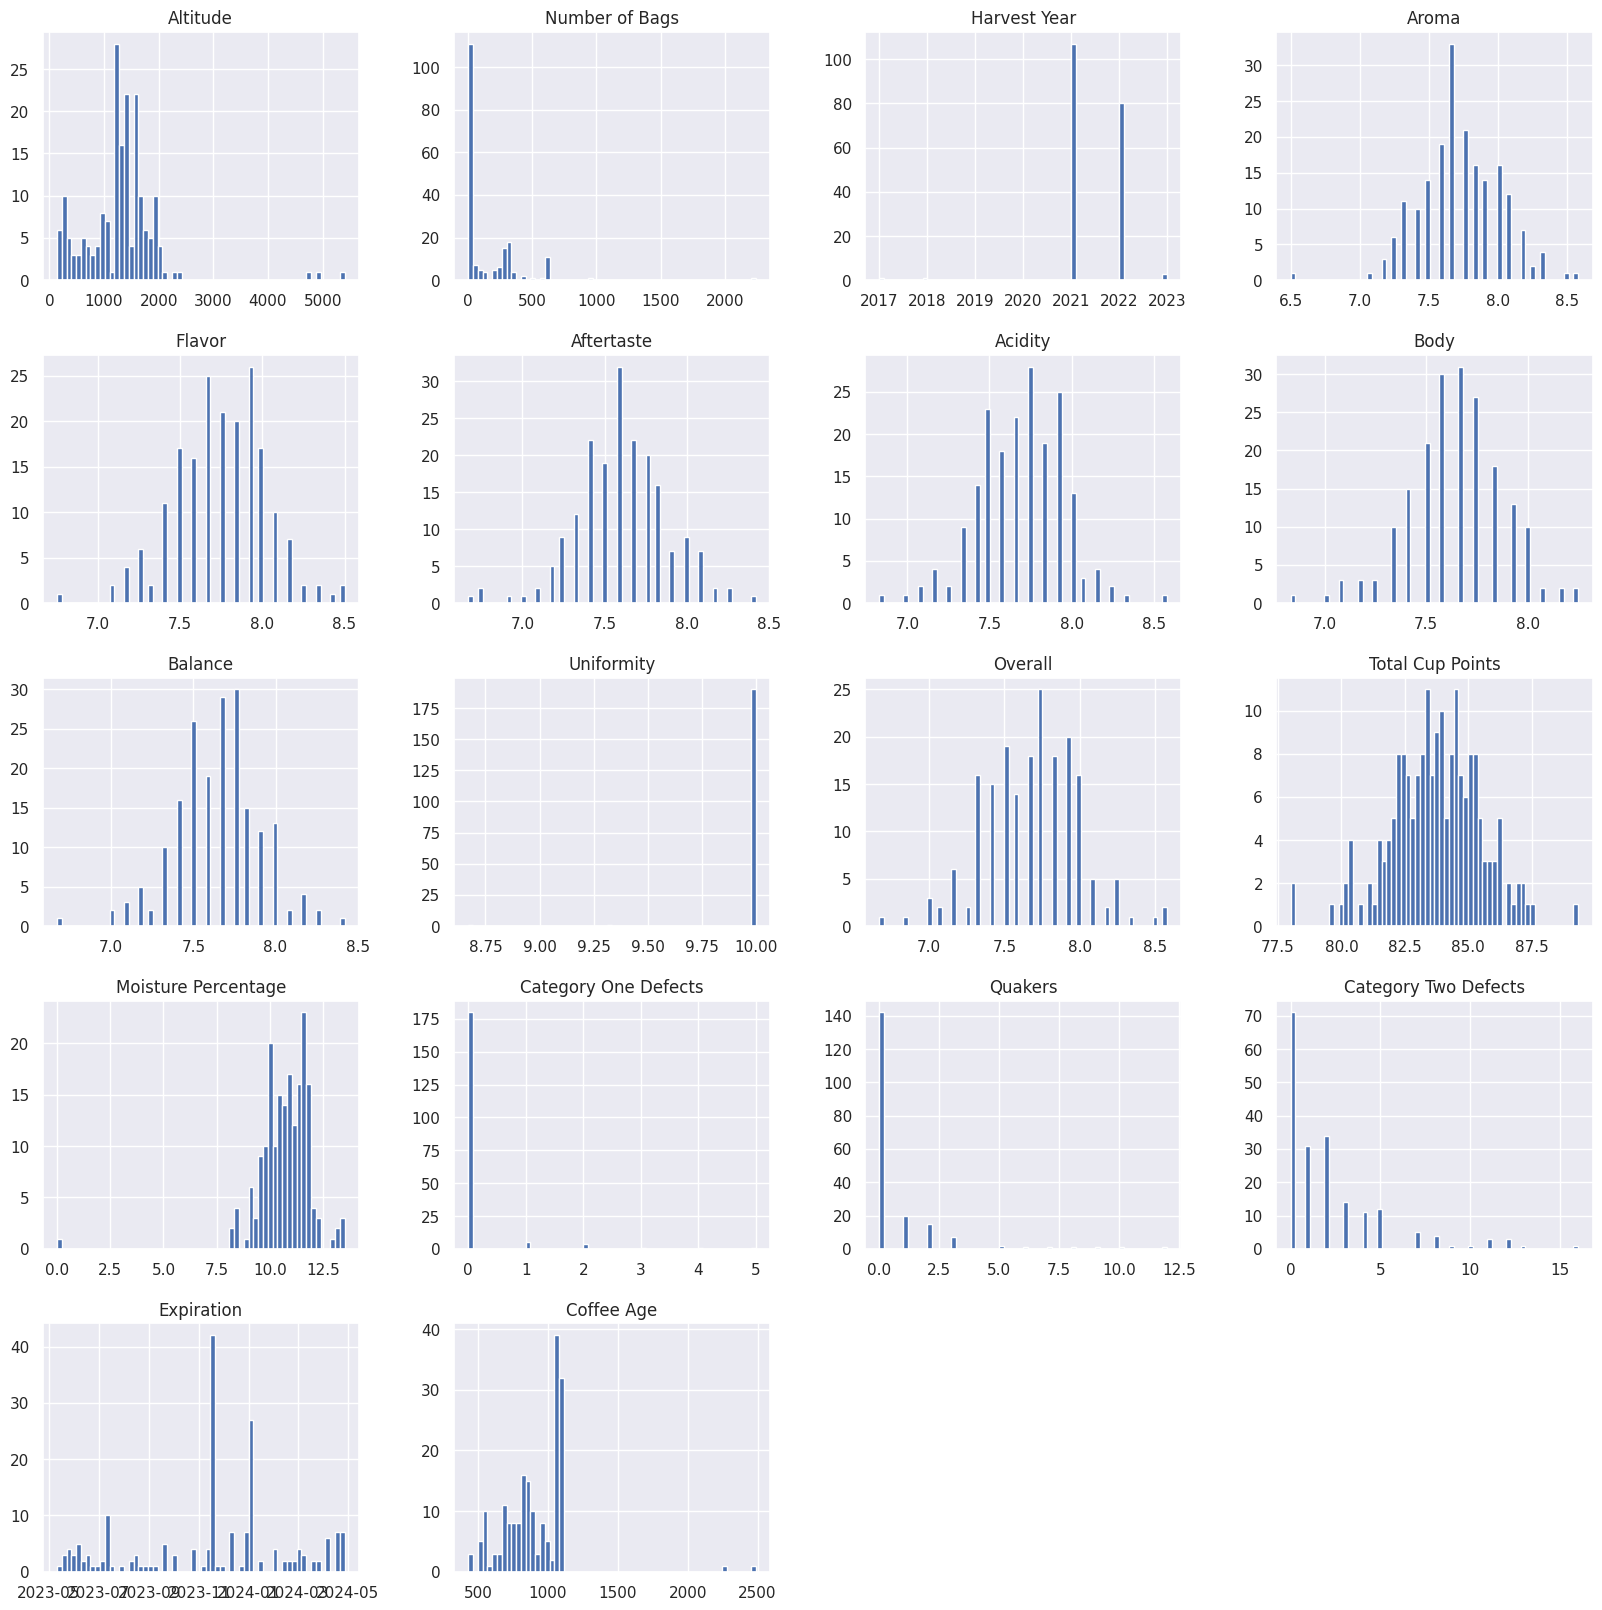

In [ ]:
#Numerical Variables
%matplotlib inline
Cq.hist(bins = 60, figsize=(20,20))
plt.show()

***Visualisation***

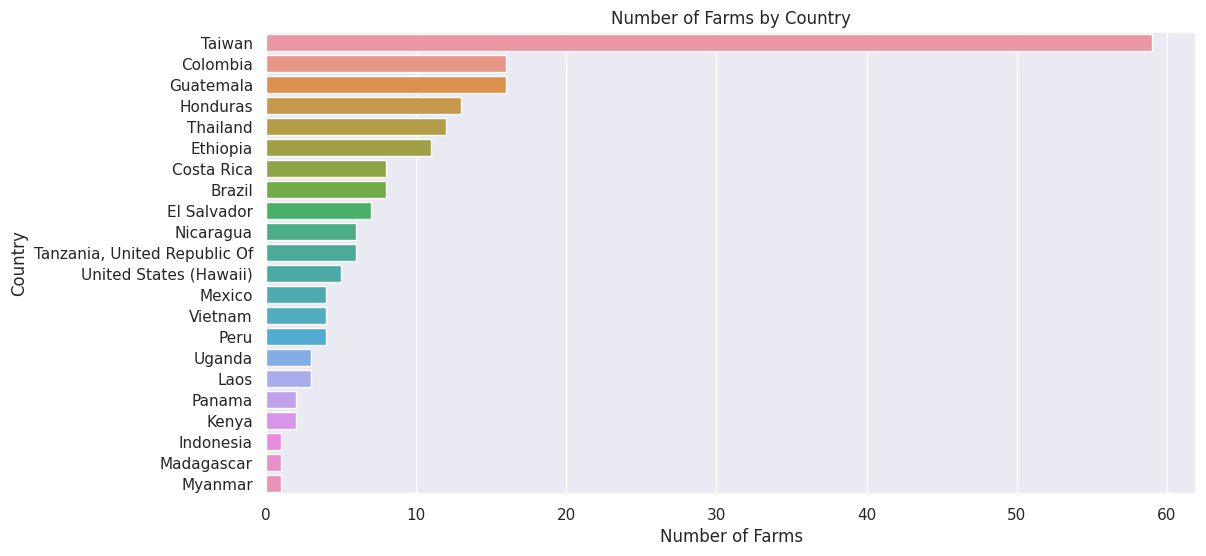

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Cq, y='Country of Origin', order=Cq['Country of Origin'].value_counts().index)
plt.xlabel('Number of Farms')
plt.ylabel('Country')
plt.title('Number of Farms by Country')
plt.show()

In [ ]:
producer_counts = Cq['Producer'].value_counts().reset_index()
producer_counts.columns = ['Producer', 'Farm Count']
sorted_producers = producer_counts.sort_values('Farm Count', ascending=False)
top_producers = sorted_producers.head(20)
fig = px.bar(top_producers, x='Producer', y='Farm Count',
             title='Top Producers', labels={'Farm Count': 'Number of Farms'})

fig.show()

fig = px.sunburst(top_producers, path=['Producer'], values='Farm Count',
                  title='Top Producers')

fig.show()

In [ ]:
company_counts = Cq['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_companies = sorted_companies.head(5)
for company in top_companies['Company']:
    company_data = Cq[Cq['Company'] == company]
    processing_counts = company_data['Processing Method'].value_counts().reset_index()
    processing_counts.columns = ['Processing Method', 'Farm Count']
    sorted_processing = processing_counts.sort_values('Farm Count', ascending=False)
    best_processing = sorted_processing.iloc[0]['Processing Method']
    fig = px.bar(sorted_processing, x='Processing Method', y='Farm Count',
                 title=f'Best Processing Method for {company}', labels={'Farm Count': 'Number of Farms'})

    fig.show()

***Geospatial Analysis***



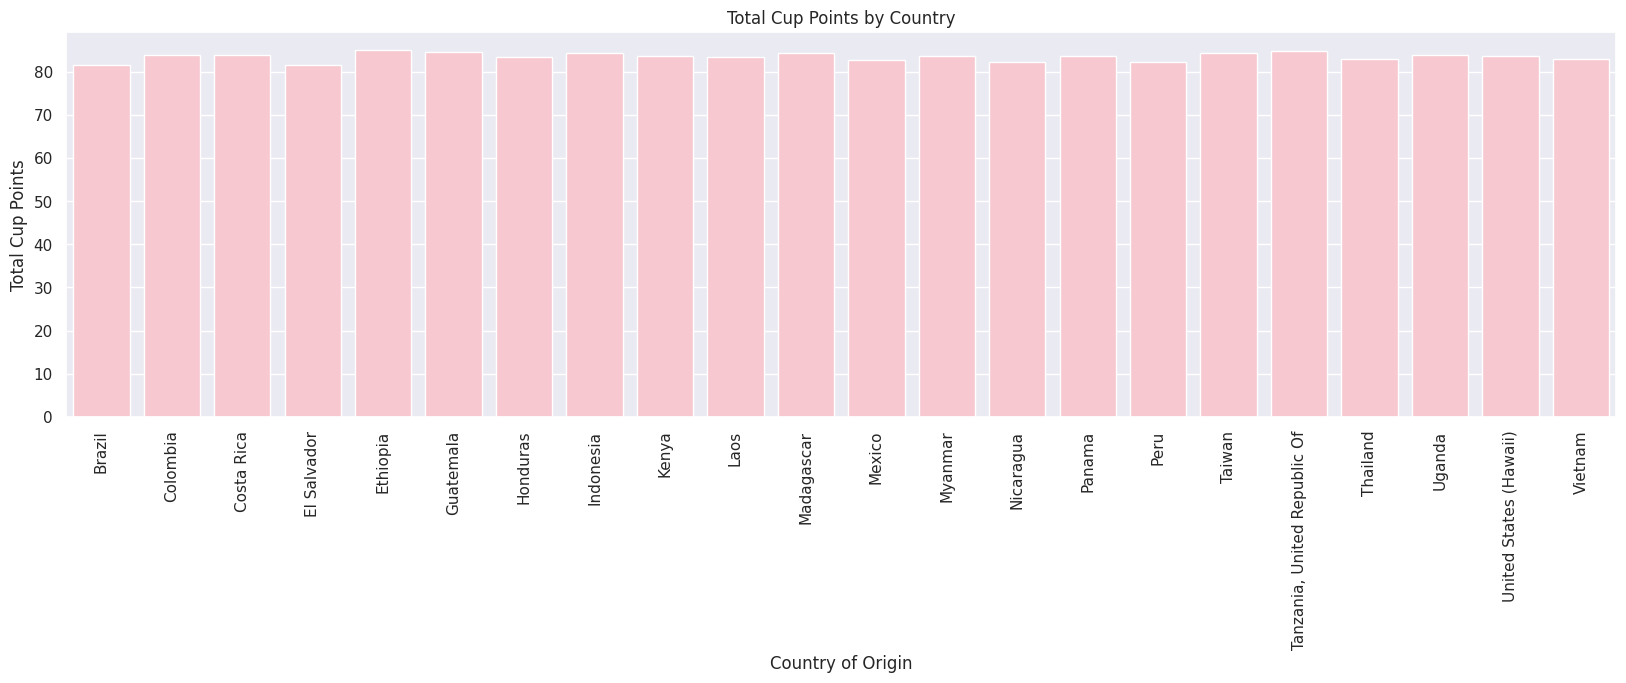

In [ ]:
# Group the data by country and calculate the mean of Total Cup Points
Cq_grouped = Cq.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(Cq_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Total Cup Points',
                    hover_name='Total Cup Points',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(20, 5))
sns.barplot(x=Cq_grouped['Country of Origin'], y=Cq_grouped['Total Cup Points'], color='pink')
plt.title('Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Total Cup Points')
plt.xticks(rotation=90)
plt.show()

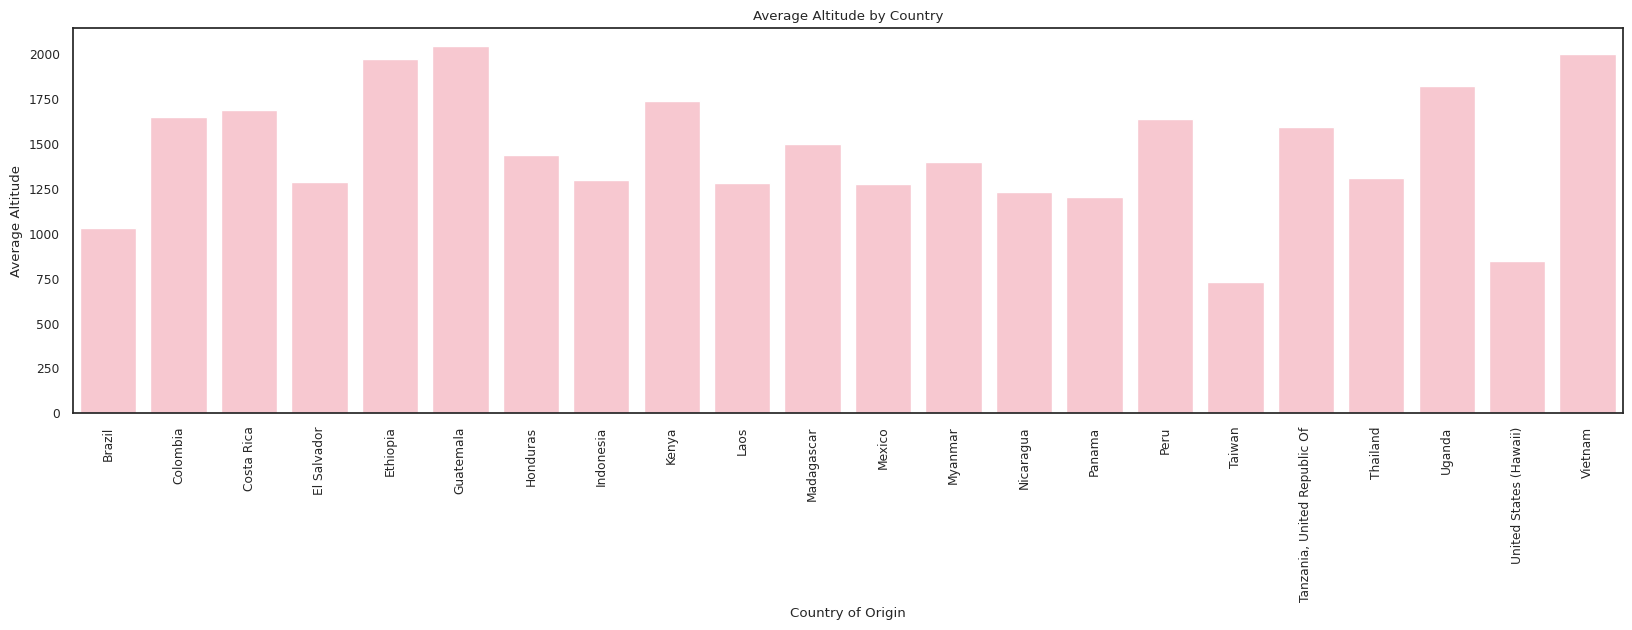

In [ ]:
# Group the data by country and calculate the mean of Total Cup Points
Cq_grouped = Cq.groupby('Country of Origin')['Altitude'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(Cq_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Altitude',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Altitude by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(20,5))
sns.barplot(x=Cq_grouped['Country of Origin'], y=Cq_grouped['Altitude'], color='pink')
plt.title('Average Altitude by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Altitude')
plt.xticks(rotation=90)
plt.show()

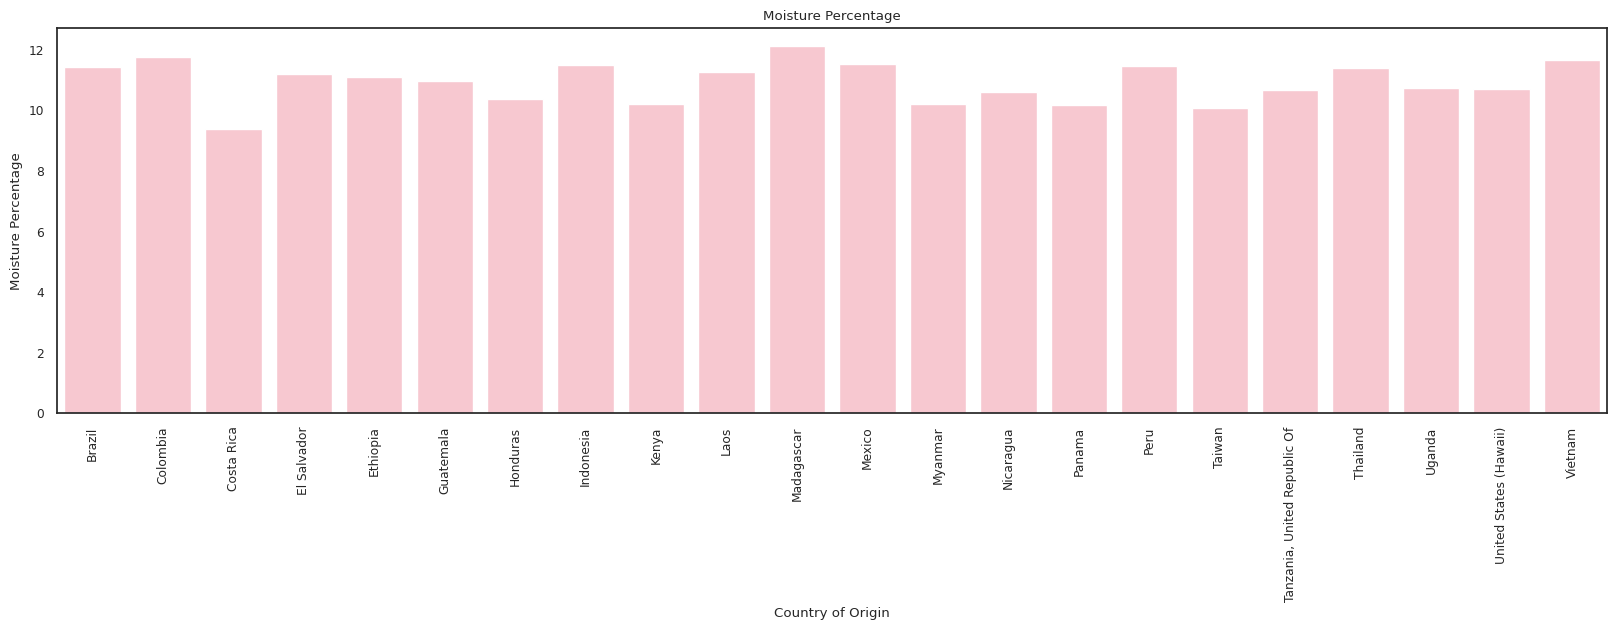

In [ ]:
# Group the data by country and calculate the mean of Moisture Percentage
Cq_grouped = Cq.groupby('Country of Origin')['Moisture Percentage'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(Cq_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Moisture Percentage',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Moisture Percentage by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(20, 5))
sns.barplot(x=Cq_grouped['Country of Origin'], y=Cq_grouped['Moisture Percentage'], color='pink')
plt.title('Moisture Percentage')
plt.xlabel('Country of Origin')
plt.ylabel('Moisture Percentage')
plt.xticks(rotation=90)
plt.show()

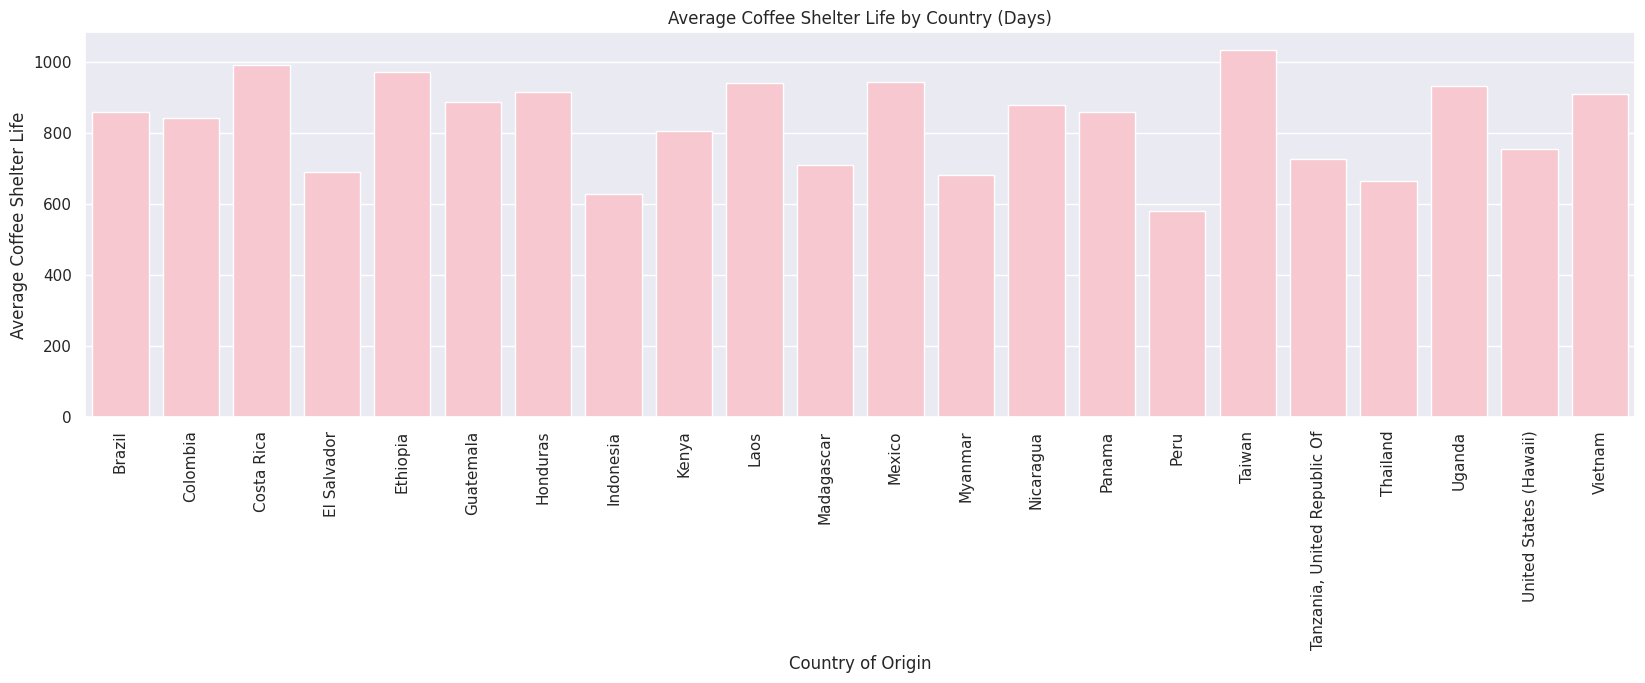

In [ ]:
# Group the data by country and calculate the mean of Total Cup Points
Cq_grouped = Cq.groupby('Country of Origin')['Coffee Age'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(Cq_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Coffee Age',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Coffee Shelter Life by Country (Days)')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(20, 5))
sns.barplot(x=Cq_grouped['Country of Origin'], y=Cq_grouped['Coffee Age'], color='pink')
plt.title('Average Coffee Shelter Life by Country (Days)')
plt.xlabel('Country of Origin')
plt.ylabel('Average Coffee Shelter Life')
plt.xticks(rotation=90)
plt.show()

# ***5.Correlation***

> Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. So we can firstly start with correlation



***Dealing with categorical and numerical column***


> We have categorical columns that we should use to analyse of the data, so we have to change these data as numerical data



In [ ]:
data = Cq.copy()
categorical_columns = ['Processing Method','Region','Color']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']
columns_to_drop = ['Country of Origin']
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)
dummy_variables.info

<bound method DataFrame.info of                                 Farm Name  \
0                        Finca El Paraiso   
1                Royal Bean Geisha Estate   
2                      OKLAO coffee farms   
3                               La Cumbre   
4                         Finca Santuario   
..                                    ...   
202                     Fazenda Conquista   
203                      Finca San Felipe   
204                                     -   
205  Rosario de Maria II, Area de La Pila   
206                         Walter Matter   

                                  Lot Number  \
0                                 CQU2022015   
1    The 2022 Pacific Rim Coffee Summit,T037   
2    The 2022 Pacific Rim Coffee Summit,LA01   
3                                 CQU2022017   
4                                 CQU2023002   
..                                       ...   
202                                   019/22   
203                             017-053-015

***Dealing with categorical variables & Preprocessing the data ***

In [ ]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Washed / Wet" : "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Pulped natural / honey" :"Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Natural / Dry": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}
# Fixing the values in the column
Cq['Processing Method'] = Cq['Processing Method'].map(processing_mapping)

In [ ]:
Cq['Processing Method'].value_counts()

Washed / Wet              122
Natural / Dry              46
Pulped natural / honey     24
Name: Processing Method, dtype: int64

In [ ]:
Cq.head().T


,0,1,2,3,4
Country of Origin,Colombia,Taiwan,Laos,Costa Rica,Colombia
Farm Name,Finca El Paraiso,Royal Bean Geisha Estate,OKLAO coffee farms,La Cumbre,Finca Santuario
Lot Number,CQU2022015,"The 2022 Pacific Rim Coffee Summit,T037","The 2022 Pacific Rim Coffee Summit,LA01",CQU2022017,CQU2023002
Mill,Finca El Paraiso,Royal Bean Geisha Estate,oklao coffee processing plant,La Montana Tarrazu MIll,Finca Santuario
Company,Coffee Quality Union,Taiwan Coffee Laboratory,Taiwan Coffee Laboratory,Coffee Quality Union,Coffee Quality Union
Altitude,1815.0,1200.0,1300.0,1900.0,1975.0
Region,"Piendamo,Cauca",Chiayi,Laos Borofen Plateau,"Los Santos,Tarrazu","Popayan,Cauca"
Producer,Diego Samuel Bermudez,曾福森,WU TAO CHI,Santa Maria de Dota,Camilo Merizalde
Number of Bags,1,1,19,1,2
Bag Weight,35 kg,80 kg,25 kg,22 kg,24 kg


In [ ]:
# ı choose Washed / Wet, Natural/Dry and Pulped natural / honey  processing methods


In [ ]:
data = Cq.copy()
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']
columns_to_drop = ['Country of Origin', 'Color']
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [ ]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_Cq = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_Cq = pd.concat([dummy_variables, scaled_numerical_Cq], axis=1)

<ipython-input-60-2f3c2c1a7d52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = processed_Cq.corr()


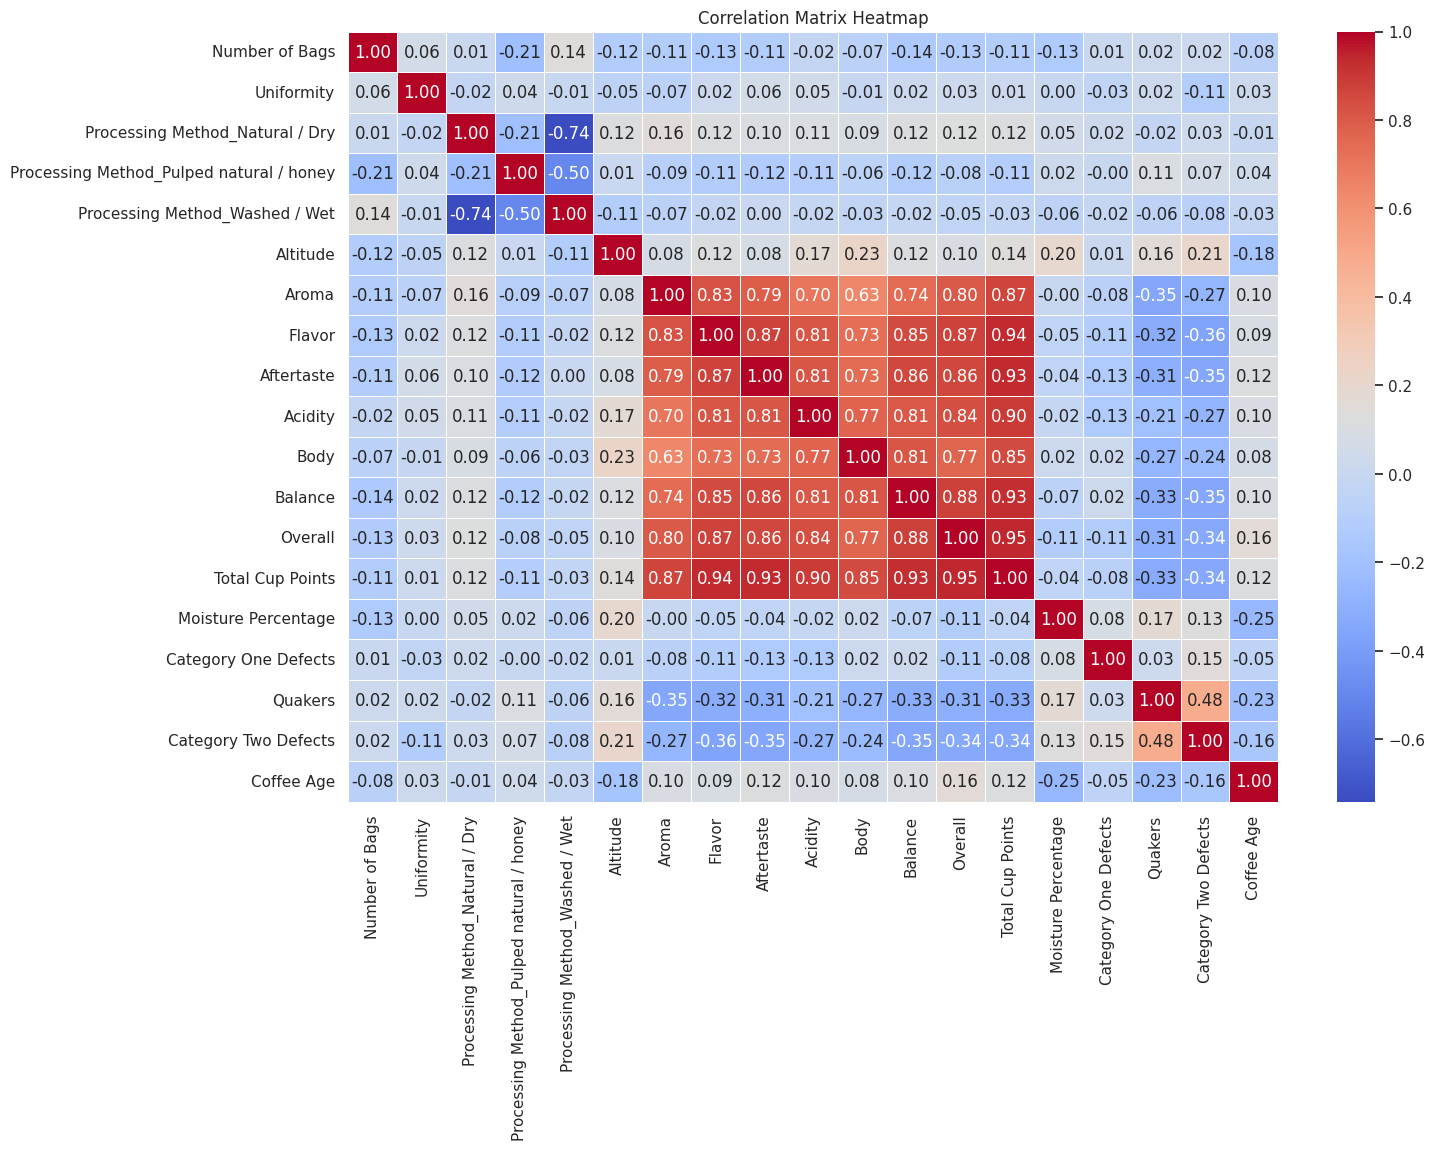

<ipython-input-60-2f3c2c1a7d52>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = processed_Cq.corr()


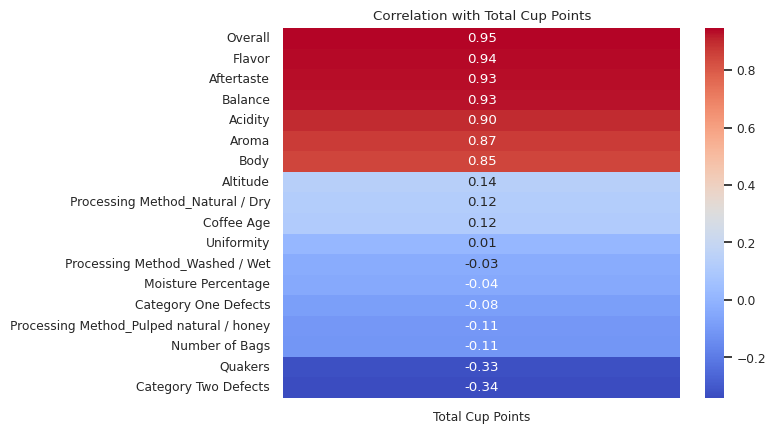

<Figure size 640x480 with 0 Axes>

In [ ]:
correlation_matrix = processed_Cq.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_Cq.corr()
target_corr = corr['Total Cup Points'].drop('Total Cup Points')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()
plt.savefig('Correlation with Total Cup Points.png')


**Statistical Analysis**

When we investigate the corelation map ; Flavor,Aftertaste,Balance, Acidity, aroma and body are directly relevant with Total cup points, respectively. We can focus on these variables .

In [ ]:
X=Cq[['Flavor','Aftertaste','Balance','Acidity','Aroma','Body']]#taking columns with highest correlation coeff
y=Cq['Total Cup Points']


In [ ]:
model = sm.OLS(y, X)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Total Cup Points   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.920e+05
Date:                Fri, 04 Aug 2023   Prob (F-statistic):                        0.00
Time:                        17:34:05   Log-Likelihood:                         -244.11
No. Observations:                 192   AIC:                                      500.2
Df Residuals:                     186   BIC:                                      519.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Flavor         1.0448      0.569      1.835      0.068      -0.078       2.168
Aftertaste     0.8717      0.554      1.575      0.117      -0.220       1.964
Balance        1.4916      0.589      2.532      0.012       0.329       2.654
Acidity        1.9811      0.485      4.083      0.000       1.024       2.938
Aroma          1.9439      0.396      4.911      0.000       1.163       2.725
Body           3.5734      0.462      7.736      0.000       2.662       4.485
==============================================================================
Omnibus:                        4.302   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.129
Skew:                           0.247   Prob(JB):                        0.127
Kurtosis:                       3.523   Cond. No.                         208.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
categorical_columns = ['Processing Method','Country of Origin', 'Color']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in numerical_columns if col != 'Total Cup Points']),
        ('cat', OneHotEncoder(), categorical_columns)])

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into train and test sets
X = Cq.drop('Total Cup Points', axis=1)
y = Cq['Total Cup Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Altitude', 'Aroma',
                                                   'Flavor', 'Aftertaste',
                                                   'Acidity', 'Body', 'Balance',
                                                   'Overall',
                                                   'Moisture Percentage',
                                                   'Category One Defects',
                                                   'Quakers',
                                                   'Category Two Defects',
                                                   'Coffee Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Processing Method',
                                                   'Country of Origin',
                                                   'Color'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

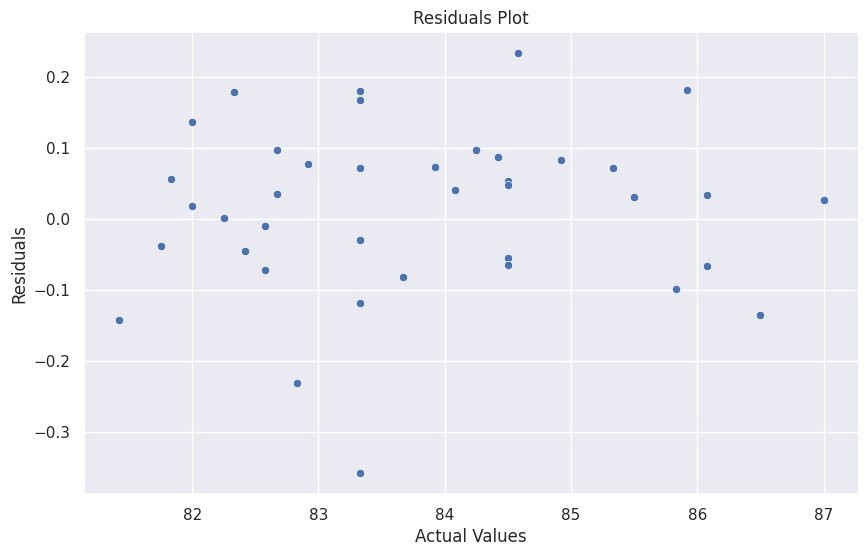

In [ ]:
# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()